<a href="https://colab.research.google.com/github/ezorigo/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [0]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [0]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [0]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [0]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [0]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [0]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [0]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
print(income.shape)
print(lifespan.shape)

(46513, 3)
(44370, 3)


In [0]:
df = pd.merge(income, lifespan)
print(df.shape)

df = pd.merge(income, lifespan, on=['geo', 'time'], how='inner')
print(df.shape)

df.head()

(40437, 4)
(40437, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [0]:
df = pd.merge(df, population)
print(df.shape)
df.head()

(40437, 5)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [0]:
entities['world_6region'].value_counts()

europe_central_asia         77
america                     53
sub_saharan_africa          53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [0]:
entities['world_4region'].value_counts()

asia        80
europe      73
africa      61
americas    57
Name: world_4region, dtype: int64

In [0]:
entity_columns_to_keep = ['country', 'name', 'world_6region', 'world_4region']

entities = entities[entity_columns_to_keep]

entities.head()

,country,name,world_6region,world_4region
0,abkh,Abkhazia,europe_central_asia,europe
1,abw,Aruba,america,americas
2,afg,Afghanistan,south_asia,asia
3,ago,Angola,sub_saharan_africa,africa
4,aia,Anguilla,america,americas


In [0]:
merged = pd.merge(df, entities, left_on='geo', right_on='country')

merged.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region,world_4region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia,asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia,asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia,asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia,asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia,asia


In [0]:
merged = merged.drop('geo', axis='columns')
merged.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region,world_4region
0,1800,603,28.21,3280000,afg,Afghanistan,south_asia,asia
1,1801,603,28.20,3280000,afg,Afghanistan,south_asia,asia
2,1802,603,28.19,3280000,afg,Afghanistan,south_asia,asia
3,1803,603,28.18,3280000,afg,Afghanistan,south_asia,asia
4,1804,603,28.17,3280000,afg,Afghanistan,south_asia,asia


In [0]:
merged = merged.rename(columns = {
    'country': 'country_code',
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': '6region',
    'world_4region': '4region'
})

merged.head()

,year,income,lifespan,population,country_code,country,6region,4region
0,1800,603,28.21,3280000,afg,Afghanistan,south_asia,asia
1,1801,603,28.20,3280000,afg,Afghanistan,south_asia,asia
2,1802,603,28.19,3280000,afg,Afghanistan,south_asia,asia
3,1803,603,28.18,3280000,afg,Afghanistan,south_asia,asia
4,1804,603,28.17,3280000,afg,Afghanistan,south_asia,asia


## Explore data


In [0]:
merged.dtypes

year              int64
income            int64
lifespan        float64
population        int64
country_code     object
country          object
6region          object
4region          object
dtype: object

In [0]:
merged.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [0]:
merged.describe(exclude='number')

,country_code,country,6region,4region
count,40437,40437,40437,40437
unique,187,187,6,4
top,alb,Mali,europe_central_asia,africa
freq,219,219,10778,11826


In [0]:
merged.country.unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',

In [0]:
usa = merged[merged.country == 'United States']
usa.head()

,year,income,lifespan,population,country_code,country,6region,4region
38028,1800,2127,39.41,6801854,usa,United States,america,americas
38029,1801,2167,39.41,6933517,usa,United States,america,americas
38030,1802,2202,39.41,7067728,usa,United States,america,americas
38031,1803,2166,39.41,7204538,usa,United States,america,americas
38032,1804,2165,39.41,7343995,usa,United States,america,americas


In [0]:
usa[usa.year.isin([1818,1918,2018])]

,year,income,lifespan,population,country_code,country,6region,4region
38046,1818,2258,39.41,9879049,usa,United States,america,americas
38146,1918,9371,47.18,106721812,usa,United States,america,americas
38246,2018,54898,79.14,326766748,usa,United States,america,americas


In [0]:
china = merged[merged.country == 'China']
china[china.year.isin([1818,1918,2018])]

,year,income,lifespan,population,country_code,country,6region,4region
6854,1818,985,32.00,374161494,chn,China,east_asia_pacific,asia
6954,1918,989,22.13,462444535,chn,China,east_asia_pacific,asia
7054,2018,16018,76.92,1415045928,chn,China,east_asia_pacific,asia


## Plot visualization

In [0]:
import seaborn as sns

now = merged[merged.year == 2018]

now.head()

,year,income,lifespan,population,country_code,country,6region,4region
218,2018,1867,58.69,36373176,afg,Afghanistan,south_asia,asia
437,2018,5846,65.19,30774205,ago,Angola,sub_saharan_africa,africa
656,2018,12424,78.01,2934363,alb,Albania,europe_central_asia,europe
922,2018,68231,76.89,9541615,are,United Arab Emirates,middle_east_north_africa,asia
1141,2018,18942,76.97,44688864,arg,Argentina,america,americas


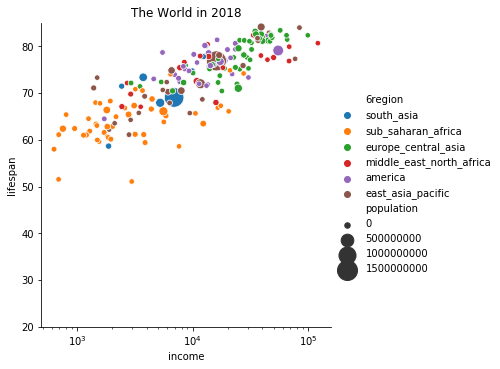

In [0]:
sns.relplot(x='income', y='lifespan', hue='6region', size='population', sizes=(30, 400), data=now);
plt.xscale('log')
plt.ylim(20, 85)
plt.title('The World in 2018')

plt.show()

## Analyze outliers

In [0]:
now.sort_values('income', ascending=False).head()

,year,income,lifespan,population,country_code,country,6region,4region
30362,2018,121033,80.71,2694849,qat,Qatar,middle_east_north_africa,asia
22212,2018,99034,82.39,590321,lux,Luxembourg,europe_central_asia,europe
31895,2018,83888,84.03,5791901,sgp,Singapore,east_asia_pacific,asia
5521,2018,76943,77.36,434076,brn,Brunei,east_asia_pacific,asia
20241,2018,68359,79.96,4197128,kwt,Kuwait,middle_east_north_africa,asia


In [0]:
now_qatar = now[now.country == 'Qatar']
now_qatar.head()

,year,income,lifespan,population,country_code,country,6region,4region
30362,2018,121033,80.71,2694849,qat,Qatar,middle_east_north_africa,asia


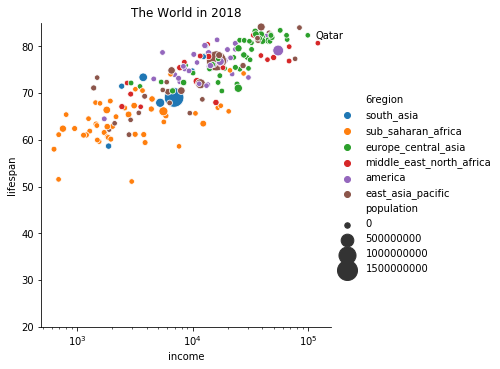

In [0]:
sns.relplot(x='income', y='lifespan', hue='6region', size='population', sizes=(30, 400), data=now);
plt.xscale('log')
plt.ylim(20, 85)
plt.title('The World in 2018')
plt.text(x=now_qatar.income-5000, y=now_qatar.lifespan+1, s='Qatar')

plt.show()

## Plot multiple years

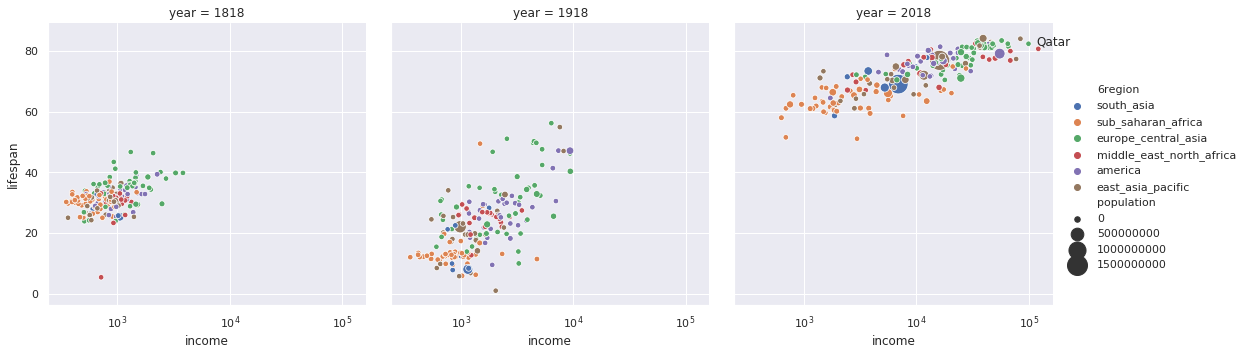

In [0]:
years = [1818, 1918, 2018]

centuries = merged[merged.year.isin(years)]

sns.relplot(x='income', y='lifespan', hue='6region', size='population', sizes=(30, 400), col='year', data=centuries)
sns.set(rc={'axes.facecolor':'White', 'figure.facecolor':'White'})
plt.xscale('log')
# plt.ylim(20, 85)
# plt.title('The World in 2018')
plt.text(x=now_qatar.income-5000, y=now_qatar.lifespan+1, s='Qatar')

plt.show()

## Point out a story

In [0]:
years_2 = [1918, 1938, 1958, 1978, 1998, 2018]

decades = merged[merged.year.isin(years_2)]

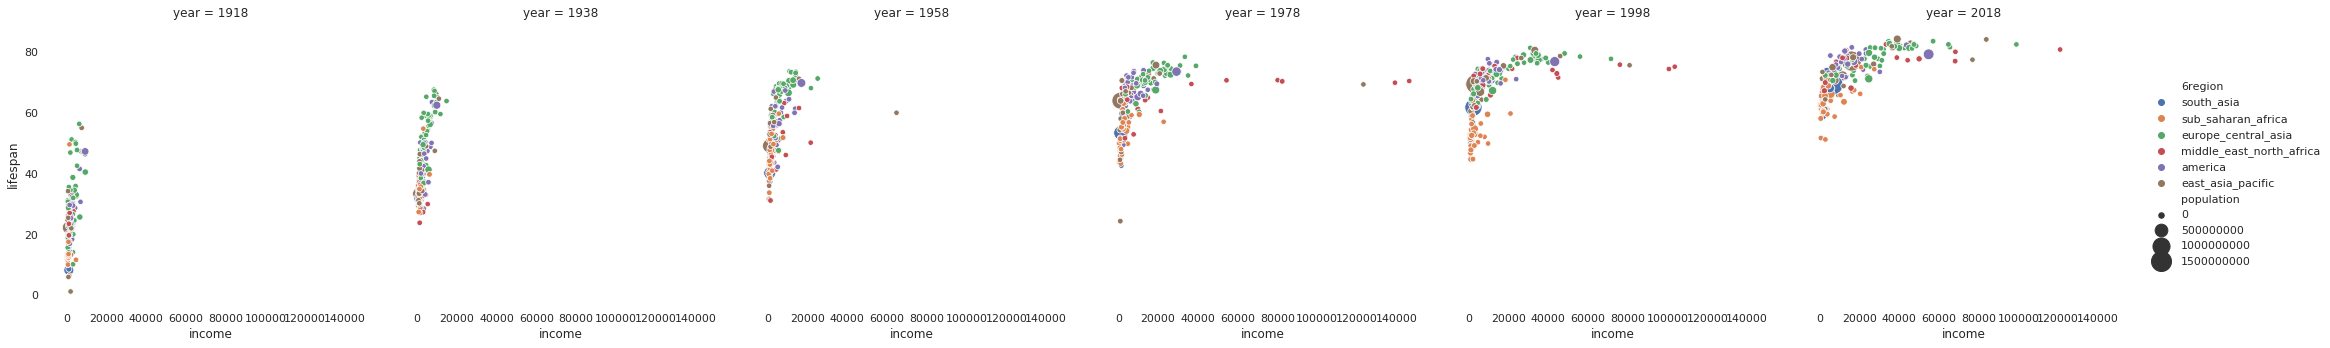

In [0]:
sns.relplot(x='income', y='lifespan', hue='6region', size='population', sizes=(30, 400), col='year', data=decades)
plt.show()

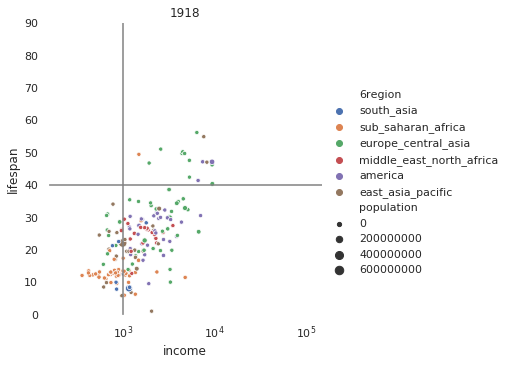

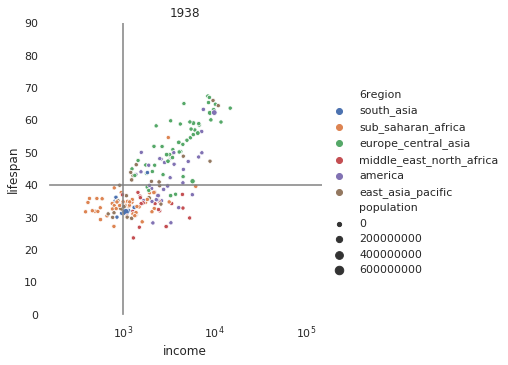

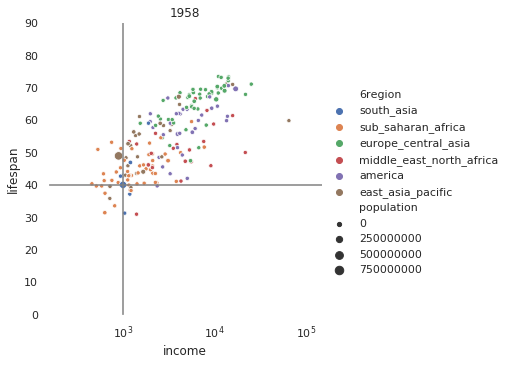

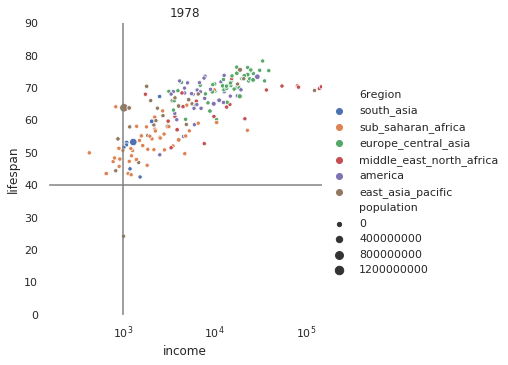

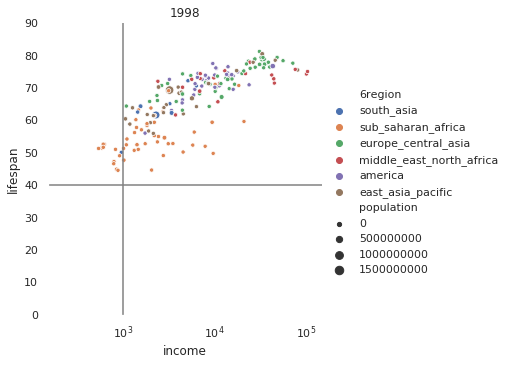

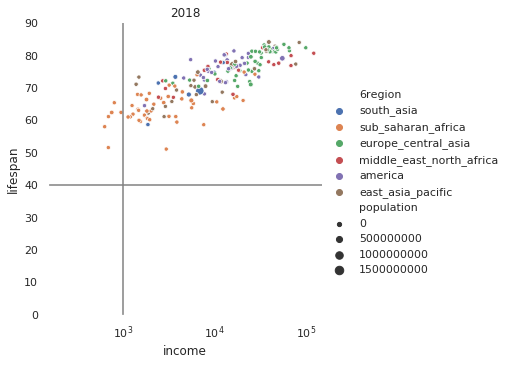

In [0]:
for year in years_2:
  sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
                data=merged[merged.year==year])
  plt.xscale('log')
  plt.xlim((150, 150000))
  plt.ylim((0, 90))
  plt.title(year)
  plt.axvline(x=1000, color='grey')
  plt.axhline(y=40, color='grey')

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project